In [ ]:
!pip install numpy pandas matplotlib scikit-learn opencv-python

## Export data from GitHub

In [ ]:
# Clone the repository
!git clone https://github.com/nisrinv/final_data.git

# Navigate to the repository directory
%cd final_data

# List the contents to verify 'test' and 'train' folders are there
!ls

Cloning into 'final_data'...
remote: Enumerating objects: 26932, done.
remote: Counting objects: 100% (2350/2350), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 26932 (delta 1), reused 2346 (delta 0), pack-reused 24582 (from 1)
Receiving objects: 100% (26932/26932), 562.11 MiB | 13.60 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Updating files: 100% (10002/10002), done.
/content/final_data
data.yaml  gitattributes  test	train


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and Preprocess Data
convert data into grayscale

In [ ]:
import os
import cv2
import numpy as np

# Function to load images from a specified folder, resize them, and store in an array
def load_images_from_folder(folder, img_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Load image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Image {img_path} could not be loaded.")
            continue
        # Resize image to specified size
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        # Extract label from filename (assuming filename contains the label)
        label = filename.split(' ')[0]  # Adjust this line based on your naming convention
        labels.append(label)
    return np.array(images), np.array(labels)

# Set the image size (width x height)
img_size = 64  # Resize images to 64x64

# Load training images and labels from the 'train/images' folder
X_train, y_train = load_images_from_folder('/content/final_data/train/images', img_size)

# Load testing images and labels from the 'test/images' folder
X_test, y_test = load_images_from_folder('/content/final_data/test/images', img_size)


## Flatten the images
KNN works with feature vectors. thus need to flatten the images

---



In [ ]:
# Flatten the images from 2D (64x64) to 1D (4096) for KNN processing
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

## Train KNN Model

---





In [ ]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # k is the number of neighbors

# Train the KNN model using the training data
knn.fit(X_train_flattened, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test_flattened)

## Model Evaluation

---



In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.97
                precision    recall  f1-score   support

             1       1.00      0.35      0.52        20
            10       1.00      1.00      1.00        20
             2       0.61      1.00      0.75        20
             3       1.00      1.00      1.00        20
             4       1.00      1.00      1.00        20
             5       1.00      1.00      1.00        20
             6       1.00      1.00      1.00        20
             7       1.00      1.00      1.00        20
             8       1.00      1.00      1.00        20
             9       1.00      1.00      1.00        20
             A       1.00      1.00      1.00        20
           Air       1.00      1.00      1.00        20
         Angsa       1.00      1.00      1.00        20
             B       1.00      0.65      0.79        20
    BadakSumbu       1.00      1.00      1.00        20
          Baju       1.00      1.00      1.00        20
         Betul       1.00      1

Confuion Matrix

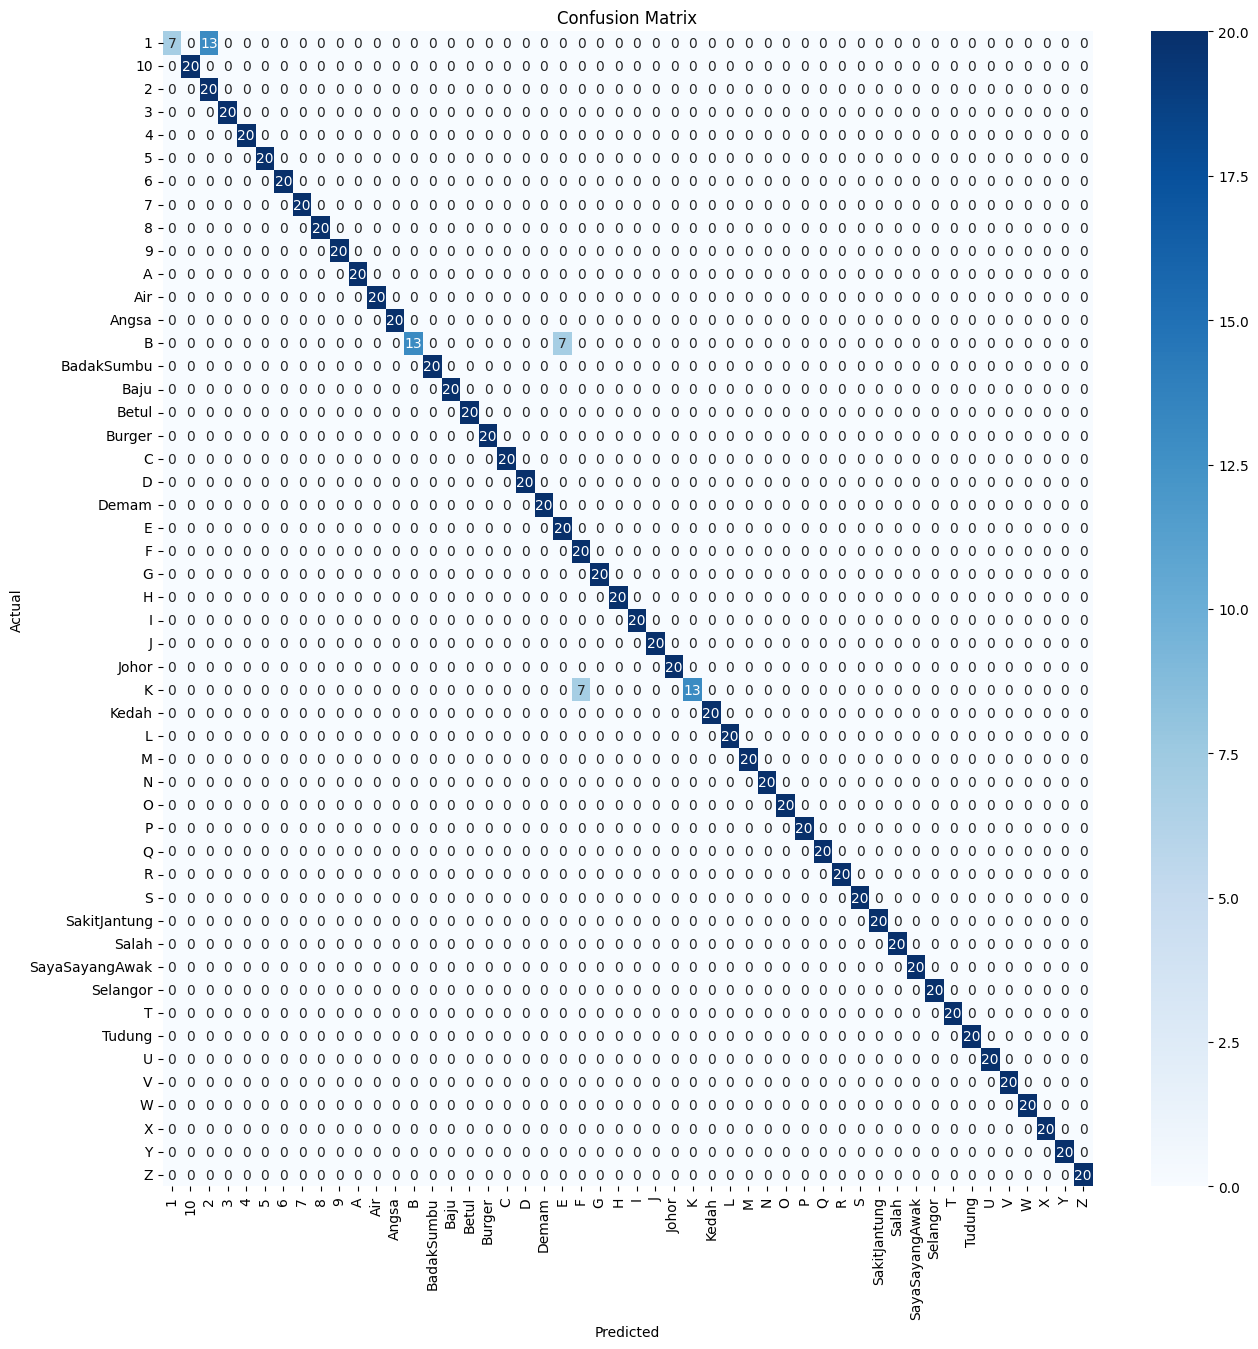

In [ ]:
import seaborn as sns  # Import seaborn for plotting

# Plot the confusion matrix
class_labels = np.unique(y_test)  # Get the unique labels
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


## Real Time Detection

In [ ]:
def predict_image(img_path, model, img_size):
    # Load and preprocess the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at path '{img_path}' could not be loaded. Please check the file path.")
    img = cv2.resize(img, (img_size, img_size))
    img_flattened = img.flatten().reshape(1, -1)
    # Predict the class of the image
    return model.predict(img_flattened)

try:
    prediction = predict_image('/content/final_data/test/images/Air (81).jpg', knn, img_size)
    print(f"Predicted Sign Language: {prediction[0]}")
except ValueError as e:
    print(e)


Predicted Sign Language: Air
